<a href="https://colab.research.google.com/github/divinelof/21120404_CMP7203_report/blob/main/SparkNotebooks/basic_eda_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting up PySpark in Colab
Spark is written in the Scala programming language and requires the Java Virtual Machine (JVM) to run. Therefore, our first task is to download Java.



In [1]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u312-b07-0ubuntu1~18.04 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u312-b07-0ubuntu1~18.

Next, we will install Apache Spark 3.0.1 with Hadoop 2.7 .


In [2]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz


--2022-05-23 10:40:20--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  24.6MB/s    in 22s     

2022-05-23 10:40:42 (12.1 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



Now, we just need to unzip that folder.


In [3]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz


There is one last thing that we need to install and that is the findspark library. It will locate Spark on the system and import it as a regular library.



In [4]:
!pip install -q findspark


Now that we have installed all the necessary dependencies in Colab, it is time to set the environment path. This will enable us to run Pyspark in the Colab environment.


In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


We need to locate Spark in the system. For that, we import findspark and use the findspark.init() method.

In [6]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

Now, we can import SparkSession from pyspark.sql and create a SparkSession, which is the entry point to Spark.

You can give a name to the session using appName() and add some configurations with config() if you wish.

In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("MyFirstEDA")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

Finally, print the SparkSession variable.

In [9]:
spark


#Loading data into PySpark
We will use the read.csv module. The inferSchema parameter provided will enable Spark to automatically determine the data type for each column but it has to go over the data once. If you don’t want that to happen, then you can instead provide the schema explicitly in the schema parameter.


In [12]:
#Loading data into PySpark
#We will use the read.csv module. The inferSchema parameter provided will enable Spark to automatically determine the data type for each column but it has to go over the data once. If you don’t want that to happen, then you can instead provide the schema explicitly in the schema parameter.


In [14]:
dfad = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)

dfbuy = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)

dfgame = spark.read.csv("/content/game-clicks.csv", header=True, inferSchema=True)

df_level= spark.read.csv("/content/level-events.csv", header=True, inferSchema=True)

df_team_assignment = spark.read.csv("/content/team-assignments.csv", header=True, inferSchema=True)

df_team = spark.read.csv("/content/team.csv", header=True, inferSchema=True)

df_user_session = spark.read.csv("/content/user-session.csv", header=True, inferSchema=True)

df_user = spark.read.csv("/content/users.csv", header=True, inferSchema=True)

The first argument specifies the URL to the daily_weather.csv file, the second argument specifies the spark-csv format, the third argument says the first line in daily_weather.csv is the header, and the fourth argument says to infer the data types.

#Compute correlation between two columns
We can compute the correlation between two columns in a DataFrame by using the corr() method. Let's compute the correlation between rain_accumulation_9am and rain_duration_9am:

In [ ]:
df2.stat.corr("rain_accumulation_9am","rain_duration_9am")

0.7298253479609021

#Create a Scatter Plot
A scatter plot shows points on a graph to show the relationship between two variables, and can be used to visually inspect the correlation between the variables.
Let's create a scatter plot to visualize the relationship between relative_humidity_9am vs. air_temp_9am


In [18]:
#Create a Scatter Plot
dfad.stat.corr("txId","userSessionId")

0.9848332193804368

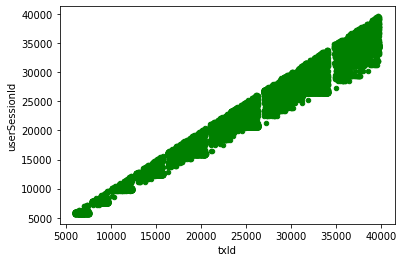

In [19]:
df3 = dfad.toPandas()
df3.plot.scatter(x='txId', y='userSessionId', c='green')

#Create a Histogram
A histogram is used to examine the distribution of a continuous variable. It divides the data into bins, and plots the frequency of occurrences within the range of each bin.
The continuous data we are going to visualize is the air_temp_9am column.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7dcffab50>]],
      dtype=object)

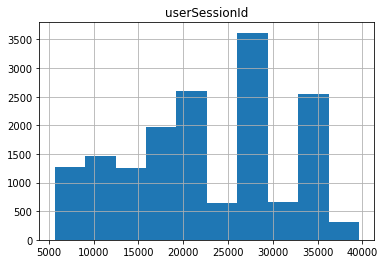

In [20]:
#Create a Histogram

df3.hist(column='userSessionId', bins=10)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

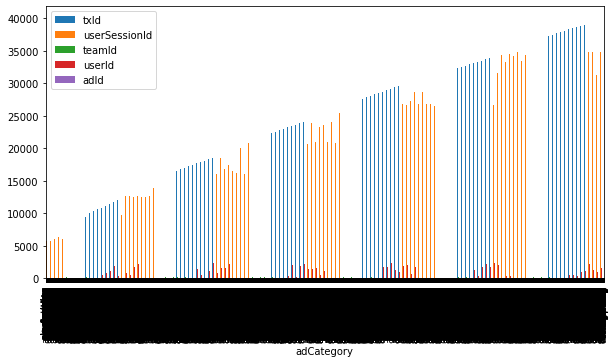

In [22]:
df3.plot.bar(x='adCategory', figsize =(10,5))

In [23]:
df_bar = df3.groupby("adCategory").agg({'adId': "sum"})
display(df_bar)

,adId
adCategory,
automotive,16414
clothing,46397
computers,40653
electronics,2759
fashion,27403
games,40630
hardware,22549
movies,29487
sports,12906


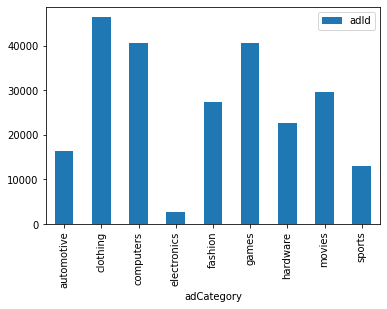

In [24]:
df_bar.plot.bar()

In [25]:
df_bar1 = df3.groupby("adCategory").count()
display(df_bar1)

,timestamp,txId,userSessionId,teamId,userId,adId
adCategory,,,,,,
automotive,566,566,566,566,566,566
clothing,2340,2340,2340,2340,2340,2340
computers,2638,2638,2638,2638,2638,2638
electronics,1097,1097,1097,1097,1097,1097
fashion,1727,1727,1727,1727,1727,1727
games,2601,2601,2601,2601,2601,2601
hardware,1588,1588,1588,1588,1588,1588
movies,1692,1692,1692,1692,1692,1692
sports,2074,2074,2074,2074,2074,2074


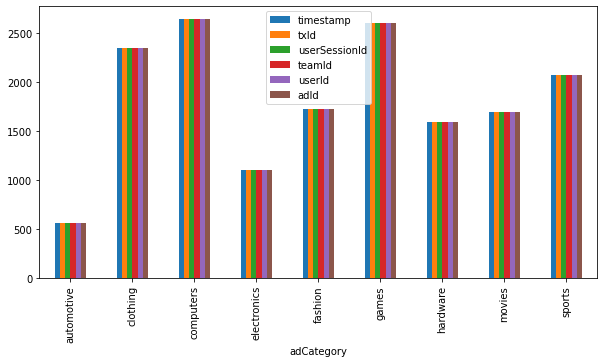

In [27]:
df_bar1.plot.bar(figsize=(10,5))

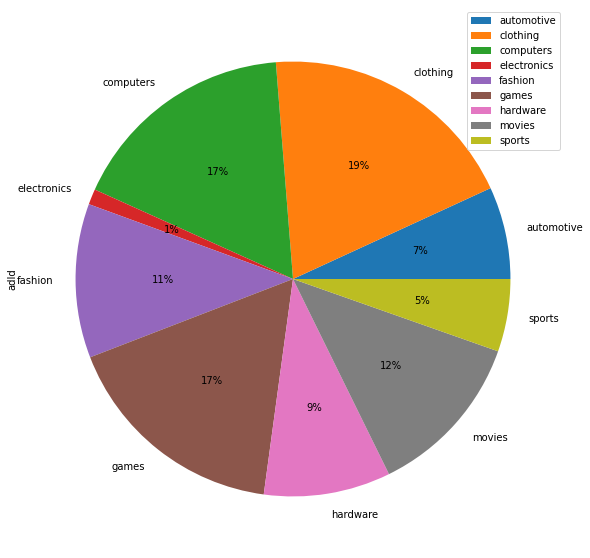

In [29]:
df_bar.plot.pie(y='adId',figsize=(15,10),autopct='%1.0f%%')

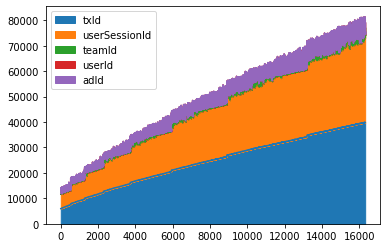

In [30]:
df3.plot.area()

In [31]:
dfbuy.stat.corr("buyId", "price")

0.9082396214188412

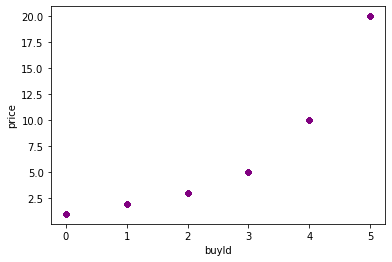

In [32]:
dfb = dfbuy.toPandas()
dfb.plot.scatter(x='buyId', y='price', c='purple')

In [33]:
dfb1 = dfb.groupby('buyId').count()
display(dfb1)

,timestamp,txId,userSessionId,team,userId,price
buyId,,,,,,
0,592,592,592,592,592,592
1,269,269,269,269,269,269
2,714,714,714,714,714,714
3,337,337,337,337,337,337
4,425,425,425,425,425,425
5,610,610,610,610,610,610


In [34]:
df_bar = dfb.groupby("buyId").agg({'price':'sum'})
display(df_bar)

,price
buyId,
0,592.0
1,538.0
2,2142.0
3,1685.0
4,4250.0
5,12200.0


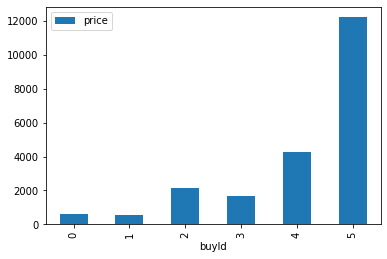

In [35]:
df_bar.plot.bar()

The scatter plot of air_temp_9am and relative_humidity_9am shows that there is a negative correlation between temperature and relative humidity. This means that an increase in temperature corresponds to a decrease in relative humidity. Since warm air can hold more water vapor than cool air, relative humidity falls when the temperature rises. This relationship is captured by the scatter plot.